In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
resumes = pd.read_csv('../data/resumes/Resume/Resume.csv')
resumes.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


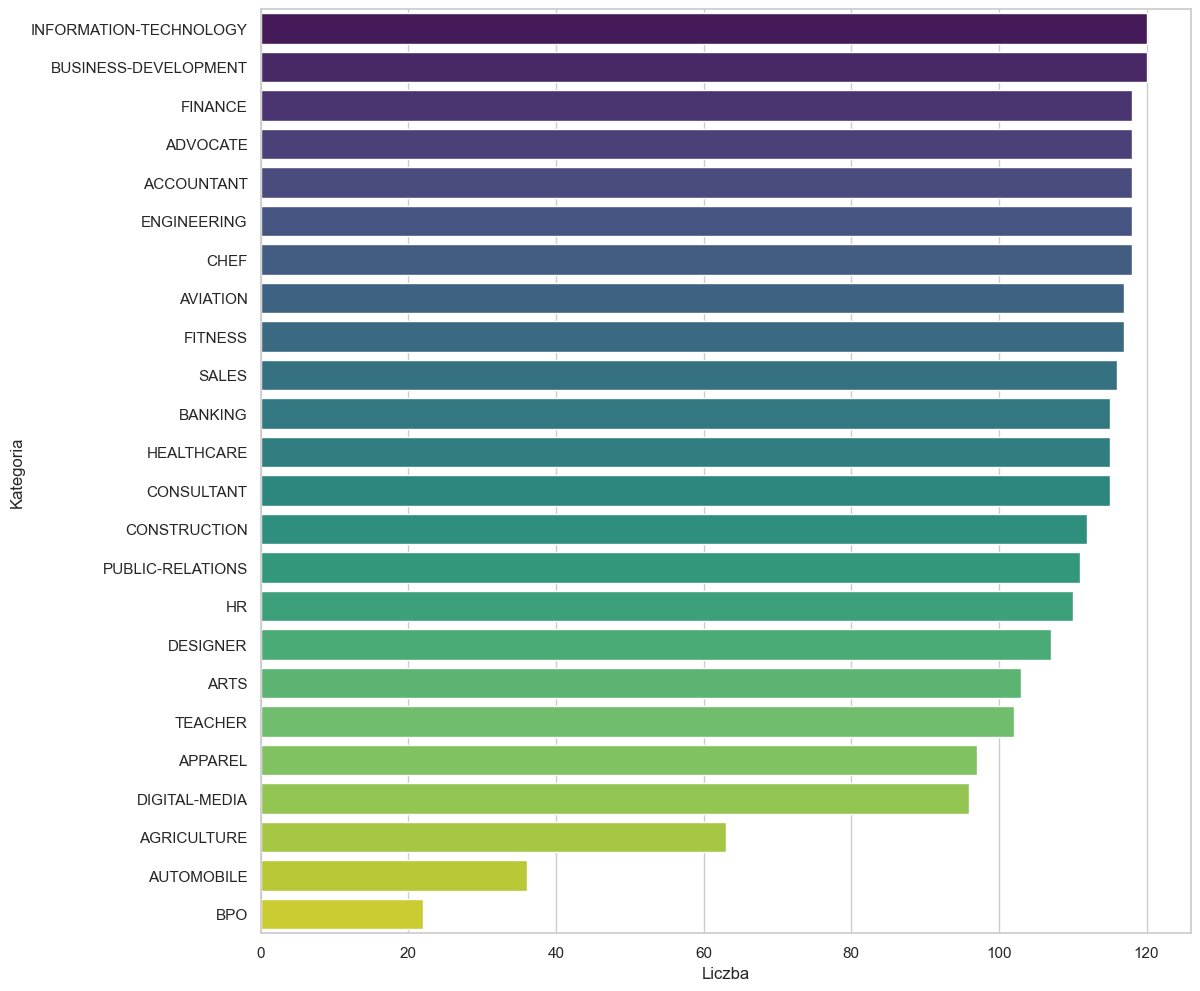

In [5]:
top_categories = resumes['Category'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 16))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Liczba')
plt.ylabel('Kategoria')
plt.show()

In [4]:
postings = pd.read_csv('job-postings\job_postings.csv')
postings.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [7]:
count = postings['skills_desc'].dropna().apply(lambda x: len(x) > 0).sum()
print(count)

337


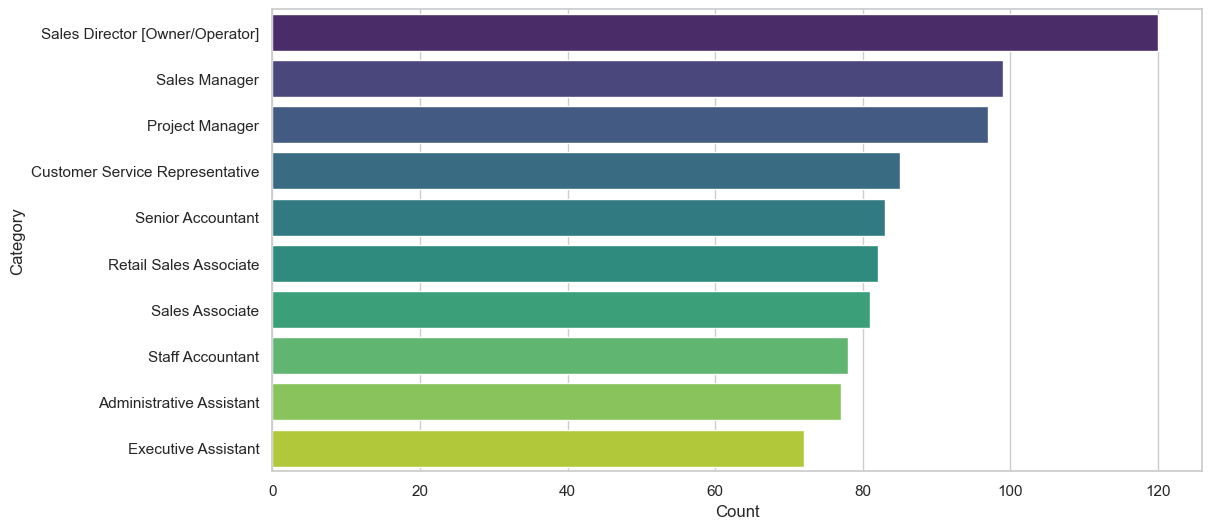

In [ ]:
top_categories = postings['title'].value_counts().nlargest(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

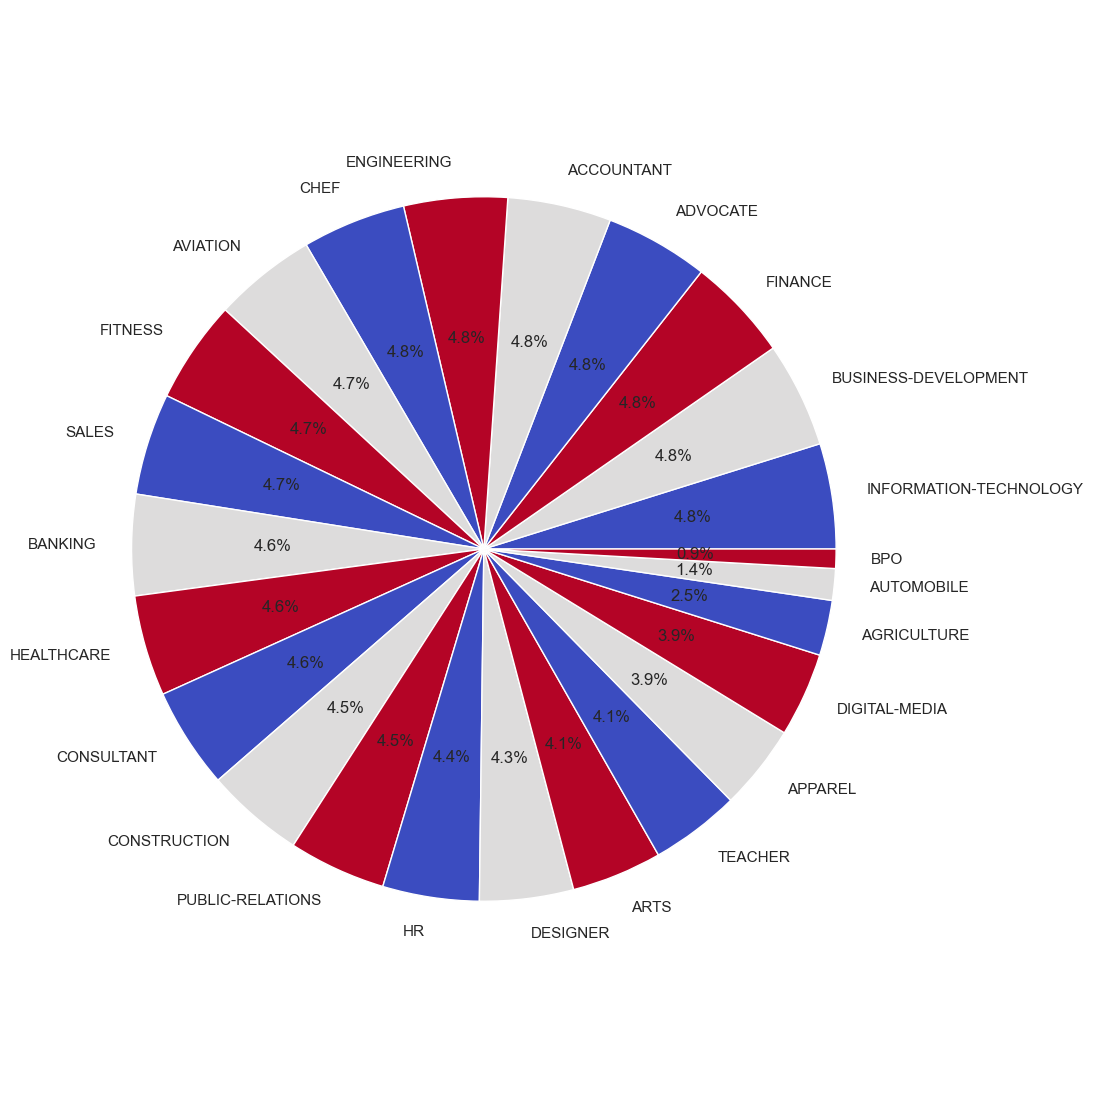

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,14))
resumes['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0,1,3)))

# Remove the default ylabel that shows as 'count'
plt.ylabel('')

# Alternatively, ensure that the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 558.5 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


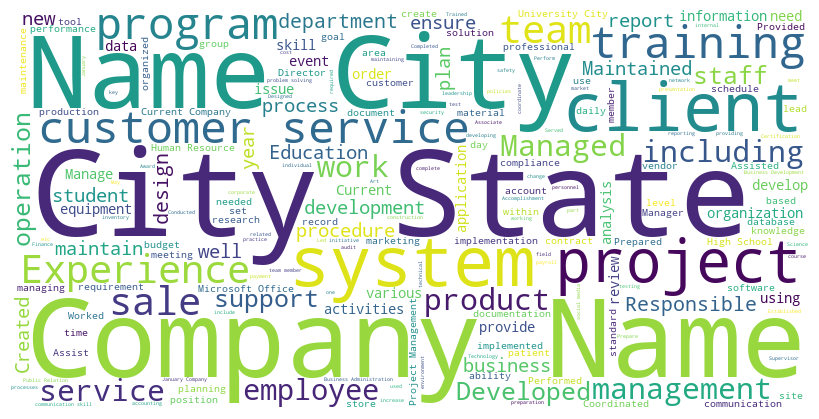

In [6]:
from wordcloud import WordCloud

all_titles = ' '.join(resumes['Resume_str'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_titles)

# Plotting the WordCloud image                        
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
## TODO:
## Extract keywords and check cosine similarity based on that and maybe do a kohonen grouping

In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming 'resumes' and 'postings' are your DataFrames and are already loaded
# For example:
# resumes = pd.read_csv('resumes.csv')
# postings = pd.read_csv('postings.csv')

# Function to train Word2Vec model
def train_word2vec(data):
    model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Function to vectorize a document using the Word2Vec model
def vectorize_doc(doc, model):
    vectors = [model.wv[word] for word in doc if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Preprocess and tokenize the texts
tokenized_resumes = [str(resume).split() for resume in resumes['Resume_str']]
tokenized_postings = [str(posting).split() for posting in postings['description']]

# Train Word2Vec model
model = train_word2vec(tokenized_resumes + tokenized_postings)

job_posting_index = 1

# Ensure the index is within range
if job_posting_index < len(postings):
    # Vectorize the chosen job posting and resumes
    vectorized_posting = vectorize_doc(tokenized_postings[job_posting_index], model)
    vectorized_resumes = [vectorize_doc(resume, model) for resume in tokenized_resumes]

    # Calculate cosine similarity
    similarity = [cosine_similarity([vectorized_posting], [resume])[0][0] for resume in vectorized_resumes]

    # Find top 5 similar resumes
    top_5_indexes = np.argsort(similarity)[::-1][:5]
    top_5_resumes = resumes.iloc[top_5_indexes]

    # Display job posting
    print("Job Posting:\n", postings['description'].iloc[job_posting_index])

    # Display top 5 similar resumes with similarity values
    for index in top_5_indexes:
        print("\nResume:\n", resumes['Resume_str'].iloc[index])
        print("Similarity Value:", similarity[index])
else:
    print("Invalid job posting index. Please choose an index within the range of the postings DataFrame.")


Job Posting:
 Metalcraft of Mayville
Metalcraft of Mayville is an Equal Opportunity Employer:Minorities/females/veterans/individuals with disabilities/sexual orientation/gender identity
Shipping & Receiving Associate 2nd shift (Beaver Dam)
US-WI-Beaver Dam
Job ID: 2023-3251
Type: Regular Full-Time
# of Openings: 1
Category: Manufacturing
Metalcraft of Mayville (Beaver Dam)
Overview
Under the direction of Shipping/Receiving Supervisor, this position packs and prepares customer orders for shipping, receives material and equipment, and loads and unloads trucks according to established procedures and shipping regulations, meeting customer delivery requirements. Assigned daily details where needed within the shipping and receiving department.
 
2nd Shift Opening
Responsibilities
Use of material handling dollies, forklifts, and other material moving equipment for unload/load of inbound/outbound freight. Opens boxes and inspects contents of inbound materials. Checks supplier shipping invoice 

In [ ]:
print(resumes['Resume_str'][0])
print(tokenized_resumes[0])
print(vectorized_resumes[0])

print(len(tokenized_resumes[0]))
print(len(vectorized_resumes[0]))

         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss preve

In [ ]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

# Assuming job_postings is a list of job posting texts
job_postings = ["""
Software Developer at Tech Innovations Inc.

Location: Silicon Valley, CA

Job Description:

We are looking for a passionate Software Developer to join our dynamic development team at Tech Innovations Inc. As a key player in our project team, you will have the opportunity to contribute to the design and development of new software products and enhancements to our existing portfolio.

Responsibilities:

Develop and implement new software programs by writing clean, efficient, and maintainable code.
Maintain and improve the performance of existing software.
Collaborate with the product team to understand end-user requirements and translate them into technical specifications.
Participate in continuous software development processes, including code reviews, testing, and debugging.
Assist in the development of documentation throughout the software development life cycle (SDLC).
Key Skills Required:

Proficient in modern programming languages such as Python, Java, and C#.
Strong understanding of web technologies including HTML, CSS, JavaScript, and modern frameworks such as React.js or Angular.
Experience with SQL and database design, preferably with MySQL or PostgreSQL.
Familiarity with version control tools, preferably Git.
Knowledge of RESTful API development and integration.
Understanding of software development methodologies, particularly Agile/Scrum.
Experience in DevOps practices and tools such as Docker and Kubernetes is a plus.
Qualifications:

Bachelor’s or Master’s degree in Computer Science, Engineering, or a related field.
At least 3 years of experience in software development.
Proven track record of delivering high-quality software solutions.
What We Offer:

Competitive salary and benefits package.
Dynamic and innovative work environment.
Opportunities for professional growth and development.
Collaborative team culture.
To apply, please submit your resume and a cover letter explaining why you are a good fit for this role."""]  # Replace with your job postings

# Data Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess(text):
    # Lowercasing, removing stopwords and non-alphabetic characters
    text = re.sub(r'\W+', ' ', text.lower())
    return " ".join([word for word in text.split() if word not in stop_words])

processed_postings = [preprocess(posting) for posting in job_postings]

# Keyword Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=50, ngram_range=(1,3))  # Adjust the number of features
X = vectorizer.fit_transform(processed_postings)
feature_array = vectorizer.get_feature_names_out()

# Displaying potential skill keywords
print("Potential skill keywords:", feature_array)

Potential skill keywords: ['agile' 'code' 'design' 'developer' 'development' 'dynamic' 'existing'
 'experience' 'inc' 'including' 'innovations' 'innovations inc' 'job'
 'key' 'modern' 'new' 'new software' 'preferably'
 'preferably git knowledge' 'preferably mysql'
 'preferably mysql postgresql' 'processes' 'processes including'
 'processes including code' 'product' 'product team'
 'product team understand' 'products' 'products enhancements'
 'products enhancements existing' 'professional' 'professional growth'
 'professional growth development' 'proficient'
 'proficient modern programming' 'programming' 'record delivering'
 'record delivering high' 'related' 'role' 'skills' 'software'
 'software developer' 'software development' 'team' 'tech'
 'tech innovations' 'tech innovations inc' 'tools' 'understanding']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

# Your job posting text
job_posting = """
Certainly! Here's an example of a job posting for a software development role, highlighting skills in programming:

Software Developer at Tech Innovations Inc.

Location: Silicon Valley, CA

Job Description:

We are looking for a passionate Software Developer to join our dynamic development team at Tech Innovations Inc. As a key player in our project team, you will have the opportunity to contribute to the design and development of new software products and enhancements to our existing portfolio.

Responsibilities:

Develop and implement new software programs by writing clean, efficient, and maintainable code.
Maintain and improve the performance of existing software.
Collaborate with the product team to understand end-user requirements and translate them into technical specifications.
Participate in continuous software development processes, including code reviews, testing, and debugging.
Assist in the development of documentation throughout the software development life cycle (SDLC).
Key Skills Required:

Proficient in modern programming languages such as Python, Java, and C#.
Strong understanding of web technologies including HTML, CSS, JavaScript, and modern frameworks such as React.js or Angular.
Experience with SQL and database design, preferably with MySQL or PostgreSQL.
Familiarity with version control tools, preferably Git.
Knowledge of RESTful API development and integration.
Understanding of software development methodologies, particularly Agile/Scrum.
Experience in DevOps practices and tools such as Docker and Kubernetes is a plus.
Qualifications:

Bachelor’s or Master’s degree in Computer Science, Engineering, or a related field.
At least 3 years of experience in software development.
Proven track record of delivering high-quality software solutions.
What We Offer:

Competitive salary and benefits package.
Dynamic and innovative work environment.
Opportunities for professional growth and development.
Collaborative team culture.
To apply, please submit your resume and a cover letter explaining why you are a good fit for this role."""  # Replace with your actual job posting text

# Function to concatenate sentences around keywords
def concatenate_around_keyword(text, keyword):
    sentences = sent_tokenize(text)
    concatenated_sentences = []

    for i, sentence in enumerate(sentences):
        if keyword in sentence.lower():
            # Concatenate the previous, current, and next sentences
            combined_sentence = ''
            if i > 0:
                combined_sentence += sentences[i-1] + ' '
            combined_sentence += sentence
            if i < len(sentences) - 1:
                combined_sentence += ' ' + sentences[i+1]
            concatenated_sentences.append(combined_sentence)
        else:
            concatenated_sentences.append(sentence)

    return concatenated_sentences

# Preprocess text
job_posting = re.sub(r'\W+', ' ', job_posting.lower())
job_posting = preprocess(job_posting)

# Concatenate sentences around 'experience'
modified_sentences = concatenate_around_keyword(job_posting, 'experience')

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(modified_sentences)
feature_array = vectorizer.get_feature_names_out()

# Display the key skill phrases
print("Key skill phrases:", feature_array)


Key skill phrases: ['agile' 'code' 'design' 'developer' 'development' 'dynamic' 'existing'
 'experience' 'inc' 'including' 'innovations' 'job' 'key' 'modern' 'new'
 'offer' 'opportunities' 'opportunity' 'package' 'participate'
 'particularly' 'passionate' 'performance' 'player' 'please' 'plus'
 'portfolio' 'postgresql' 'posting' 'practices' 'preferably' 'processes'
 'product' 'products' 'professional' 'proficient' 'programming' 'programs'
 'project' 'proven' 'python' 'quality' 'role' 'skills' 'software' 'team'
 'tech' 'tools' 'understanding' 'work']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
